# Dataset  Analysis Project
Data source : https://www.kaggle.com/datasets/furkanima/worldwide-travel-cities-ratings-and-climate/data

## Dataset Description 
Key Features:

- City Metadata: Name, country, region, and coordinates
- Short Descriptions: One-liner summaries of each city's vibe or appeal.
- Climate Info: Monthly average, max, and min temperatures.
- Ideal Durations: Suggested trip lengths such as "Weekend", "Short trip", "Long trip".
- Budget Level: Classified as "Budget", "Mid-range", or "Luxury".
- Thematic Ratings (0–5 scale): Culture, Adventure, Nature, Beaches, Nightlife, Cuisine, Wellness, Urban



# 01 Dataset loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Worldwide Travel.csv")
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


In [4]:
df.shape

(560, 19)

In [5]:
df.index

RangeIndex(start=0, stop=560, step=1)

## 02 Data Types

In [6]:
df.dtypes.value_counts()

int64      9
object     8
float64    2
Name: count, dtype: int64

In [7]:
string_columns = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [8]:
df.loc[:, string_columns].head()

,id,city,country,region,short_description,avg_temp_monthly,ideal_durations,budget_level
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...","{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...","{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget


In [9]:
df.loc[:, numeric_columns].head()

,latitude,longitude,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,45.464194,9.189635,5,2,2,1,4,5,3,5,2
1,-17.290947,177.125786,2,4,5,5,2,3,4,1,5
2,50.117190,-122.954302,3,5,5,2,3,3,4,2,4
3,20.987700,-101.000000,5,3,3,1,3,4,3,4,2
4,-7.245972,112.737827,4,3,3,2,3,4,3,4,2


## 03 NaN Analysis

In [10]:
nan_counts = df.isna().sum()

In [11]:
nan_counts

id                   0
city                 0
country              0
region               0
short_description    0
latitude             0
longitude            0
avg_temp_monthly     0
ideal_durations      0
budget_level         0
culture              0
adventure            0
nature               0
beaches              0
nightlife            0
cuisine              0
wellness             0
urban                0
seclusion            0
dtype: int64

In [12]:
# our data set has 0 Nan Values

# 04 General Analysis

In [13]:
df.loc[:, string_columns].describe()

,id,city,country,region,short_description,avg_temp_monthly,ideal_durations,budget_level
count,560,560,560,560,560,560,560,560
unique,560,559,167,7,560,545,21,3
top,c54acf38-3029-496b-8c7a-8343ad82785c,Granada,United States,europe,"Chic streets lined with fashion boutiques, his...","{""1"":{""avg"":28.5,""max"":32.5,""min"":25.2},""2"":{""...","[""Short trip"",""Weekend"",""One week""]",Mid-range
freq,1,2,50,177,1,3,120,339


In [14]:
df.loc[:, numeric_columns].describe()

,latitude,longitude,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
count,560.000000,560.000000,560.00000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,22.502186,7.914665,3.85000,3.178571,3.728571,2.380357,3.019643,3.792857,3.073214,3.146429,3.028571
std,27.980022,78.813803,0.81291,0.798190,0.903920,1.435547,0.921599,0.679329,0.592134,1.018604,0.989699
min,-54.807306,-175.201808,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,5.268054,-64.439118,3.00000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000
50%,31.793618,10.711854,4.00000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,43.673199,50.020162,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,78.719852,179.332896,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: >

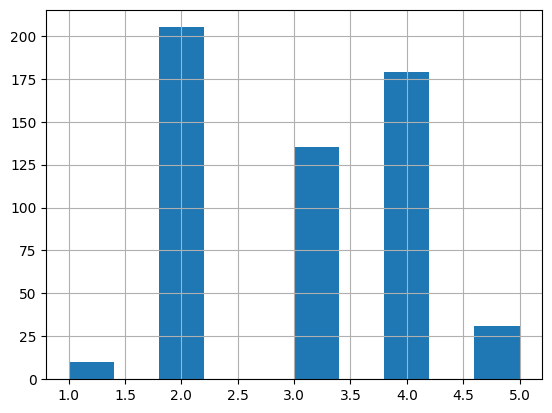

In [20]:
df.seclusion.hist()

# 05 Target column analysis

In [21]:
df.seclusion.isna().sum()

np.int64(0)

In [22]:
df = df.loc[df.seclusion.notna(), :]
df.shape

(560, 19)

(array([ 10.,   0., 205.,   0.,   0., 135.,   0., 179.,   0.,  31.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

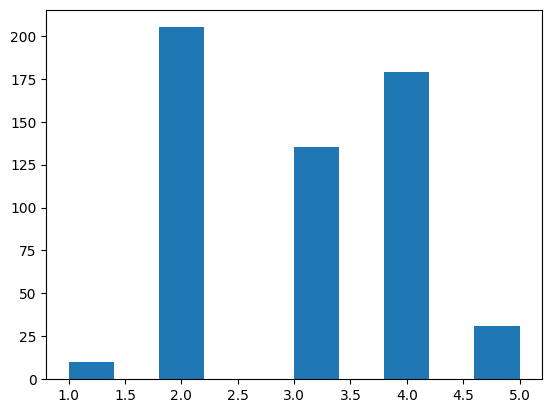

In [25]:
plt.hist(df.seclusion)

<Axes: ylabel='seclusion'>

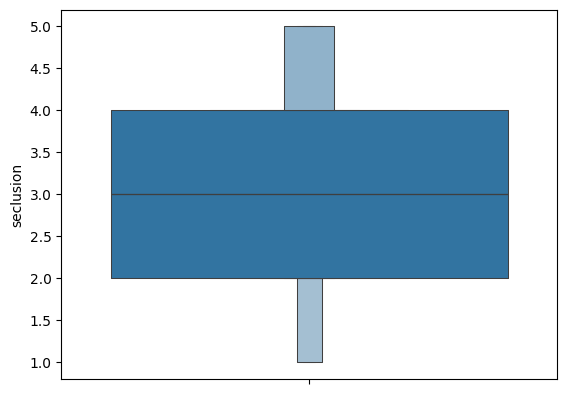

In [26]:
sns.boxenplot(df.seclusion)

## 05.1 Correlation analysis

In [28]:
df = df.loc[:, numeric_columns]
df.corr()["seclusion"].sort_values(ascending=False)

seclusion    1.000000
nature       0.688567
adventure    0.435114
beaches      0.139655
wellness     0.078843
longitude    0.075550
latitude    -0.189204
culture     -0.388228
cuisine     -0.544619
nightlife   -0.726296
urban       -0.795591
Name: seclusion, dtype: float64

In [ ]:
# seclusion  has strong correlation with nature also negative with urban,nightlife
# seclusion means more nature and adventure experience

In [29]:
corr_df = pd.DataFrame()
corr_df["pearson"] = df.corr(method="pearson")["seclusion"].sort_values()
corr_df["kendall"] = df.corr(method="kendall")["seclusion"].sort_values()
corr_df["spearman"] = df.corr(method="spearman")["seclusion"].sort_values()

In [30]:
corr_df

,pearson,kendall,spearman
urban,-0.795591,-0.734867,-0.805069
nightlife,-0.726296,-0.662011,-0.728902
cuisine,-0.544619,-0.492848,-0.544294
culture,-0.388228,-0.339019,-0.381330
latitude,-0.189204,-0.129908,-0.176351
longitude,0.075550,0.056358,0.075763
wellness,0.078843,0.060239,0.069415
beaches,0.139655,0.094175,0.112026
adventure,0.435114,0.371872,0.429094
nature,0.688567,0.622180,0.690676


<function matplotlib.pyplot.show(close=None, block=None)>

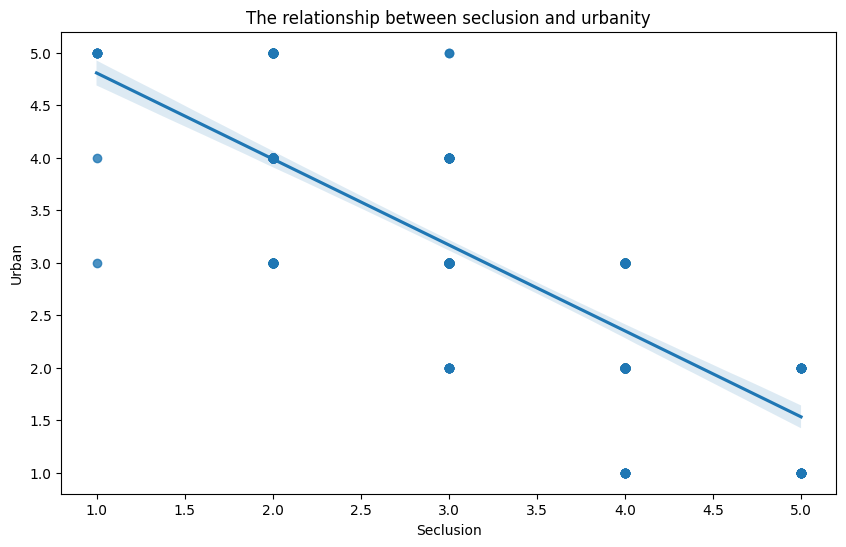

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="seclusion", y="urban")
plt.title("The relationship between seclusion and urbanity")
plt.xlabel("Seclusion")
plt.ylabel("Urban")
plt.show

In [ ]:
# A clear decline: confirmation of a strong negative correlation — the more secluded a place is, the less urban it is.

<function matplotlib.pyplot.show(close=None, block=None)>

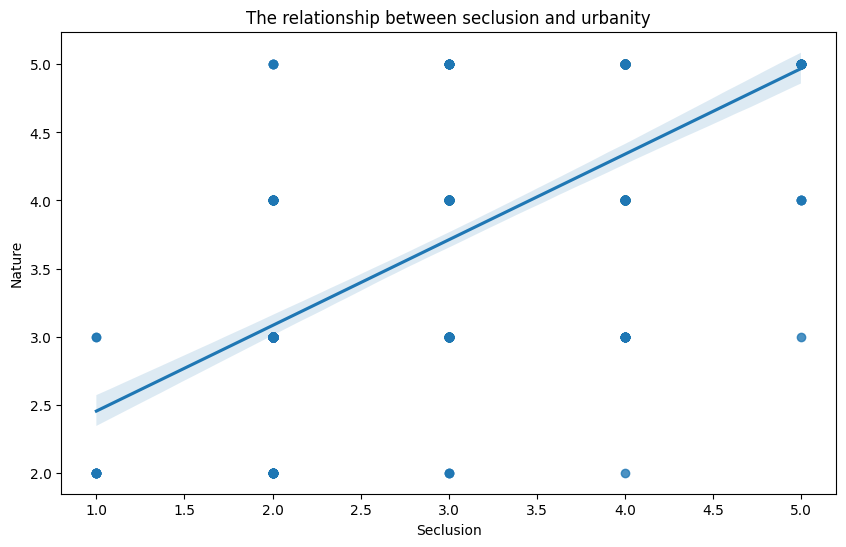

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="seclusion", y="nature")
plt.title("The relationship between seclusion and urbanity")
plt.xlabel("Seclusion")
plt.ylabel("Nature")
plt.show

In [ ]:
#The more "seculded" the destination, the more likely it is to be set in a natural environment rather than an urban one.

# 06 Seclusion 

In [13]:
def seclusion_bucket(x):
    if x <=2:
        return "low"
    elif x == 3:
        return "mid"
    else:
        return "high"

In [14]:
df["seclusion_level"] = df["seclusion"].apply(seclusion_bucket)

In [18]:
df["seclusion_level"].value_counts()

seclusion_level
low     215
high    210
mid     135
Name: count, dtype: int64

In [27]:
#seclusion divided by level

In [21]:
colums_to_analyze = ["urban", "nightlife", "wellness", "nature", "culture", "cuisine"]

In [23]:
grouped = df.groupby("seclusion_level")[colums_to_analyze].mean().round(2)
print(grouped)

                 urban  nightlife  wellness  nature  culture  cuisine
seclusion_level                                                      
high              2.22       2.28      3.13    4.44     3.49     3.40
low               4.02       3.73      3.05    3.05     4.19     4.20
mid               3.19       3.04      3.02    3.70     3.87     3.76


Interesting facts:

- High seclusion → significantly higher nature (4.44) and more wellness than urban locations.

- Low seclusion → more urban (4.02), culture, and cuisine.

- Mid has a balanced profile, but still decent nature (3.70) and culture.

## 06.1 Map of destinations by seclusion

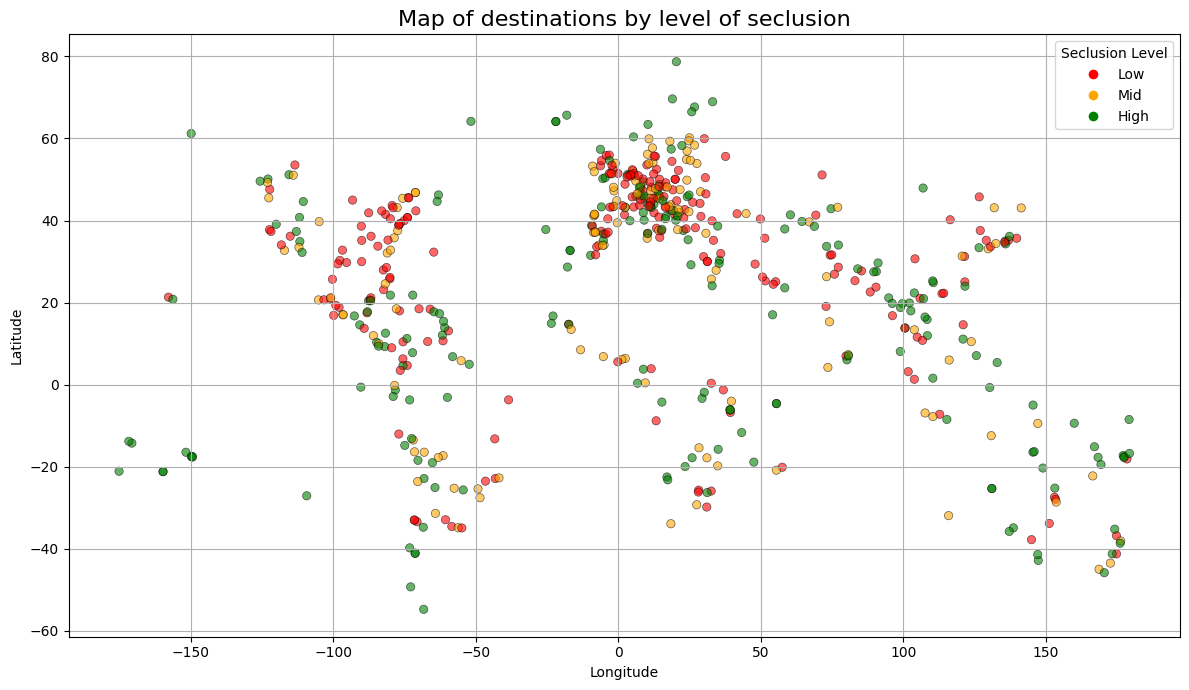

In [26]:
color_map = {"low": "red", "mid": "orange", "high": "green"}
colors = df["seclusion_level"].map(color_map)

plt.figure(figsize=(12, 7))
plt.scatter(df["longitude"], df["latitude"], c=colors, alpha=0.6, edgecolors="k", linewidths=0.5)
plt.title("Map of destinations by level of seclusion", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Low', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Mid', markerfacecolor='orange', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='High', markerfacecolor='green', markersize=8)
], title="Seclusion Level")

plt.tight_layout()
plt.show()

In [ ]:
#This graph shows the location of destinations according to their seclusion level based on latitude and longitude.

## 06.2 Searching for the most suitable destinations

- By traveler type:

- "Nature lover" (looking for: high nature, low urban)

- "Night owl" (looking for: nightlife, cuisine)
➡️ Suitable if you want to recommend destinations based on profile.

In [3]:
features = ["nature", "urban", "nightlife", "cuisine", "seclusion", "wellness"]
df_norm = df.copy()
for f in features:
    df_norm[f + "_norm"] = (df[f] - df[f].min()) / (df[f].max() - df[f].min())

In [4]:
weights_nature = {
    "nature_norm": 0.5,    
    "urban_norm": -0.3,    
    "seclusion_norm": 0.2  
}

weights_night = {
    "nightlife_norm": 0.5,
    "cuisine_norm": 0.3,
    "urban_norm": 0.2
}

In [5]:
df_norm["score_nature"] = (df_norm[list(weights_nature.keys())] * list(weights_nature.values())).sum(axis=1)
df_norm["score_night"] = (df_norm[list(weights_night.keys())] * list(weights_night.values())).sum(axis=1)

In [6]:
top_nature = df_norm.sort_values("score_nature", ascending=False)[["city","country","score_nature"] + features].head(10)
top_night = df_norm.sort_values("score_night", ascending=False)[["city","country","score_night"] + features].head(10)

In [8]:
print("Top 10 destinations for Nature lovers:")
print(top_nature.to_string(index=False))
print("\nTop 10 destinations for Night Owls:")
print(top_night.to_string(index=False))

Top 10 destinations for Nature lovers:
                     city          country  score_nature  nature  urban  nightlife  cuisine  seclusion  wellness
           Yasawa Islands             Fiji           0.7       5      1          2        3          5         4
Yellowstone National Park    United States           0.7       5      1          1        2          5         3
               Raja Ampat        Indonesia           0.7       5      1          1        3          5         3
               Ayers Rock        Australia           0.7       5      1          1        2          5         3
               Siwa Oasis            Egypt           0.7       5      1          1        3          5         4
        Galápagos Islands          Ecuador           0.7       5      1          1        3          5         2
                    Uluru        Australia           0.7       5      1          1        3          5         3
                   Ladakh            India           0.7 

## 06.3 Top 10 for "nature" and "night owl"

In [9]:
top_nature = df_norm.sort_values("score_nature", ascending=False).head(10)
top_night = df_norm.sort_values("score_night", ascending=False).head(10)

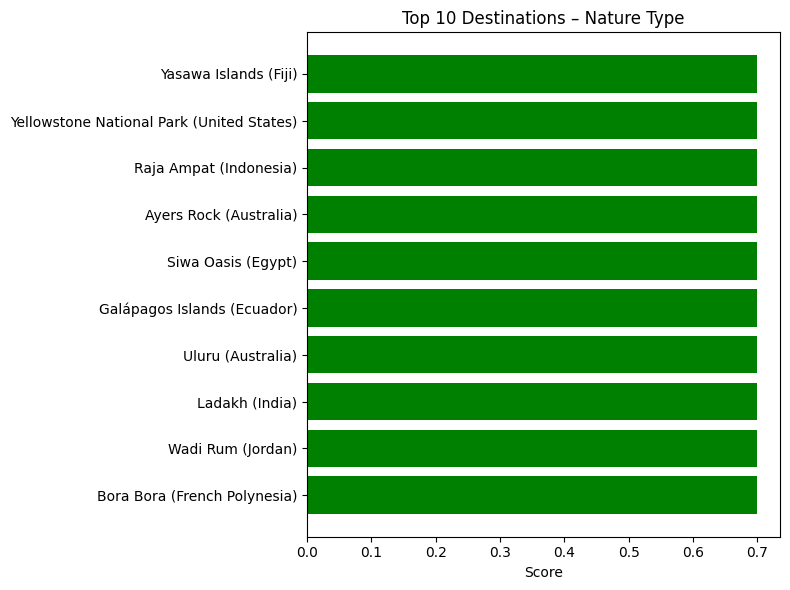

In [13]:
plt.figure(figsize=(8,6))
plt.barh(top_nature["city"] + " (" + top_nature["country"] + ")", top_nature["score_nature"], color="green")
plt.gca().invert_yaxis()  
plt.title("Top 10 Destinations – Nature Type")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

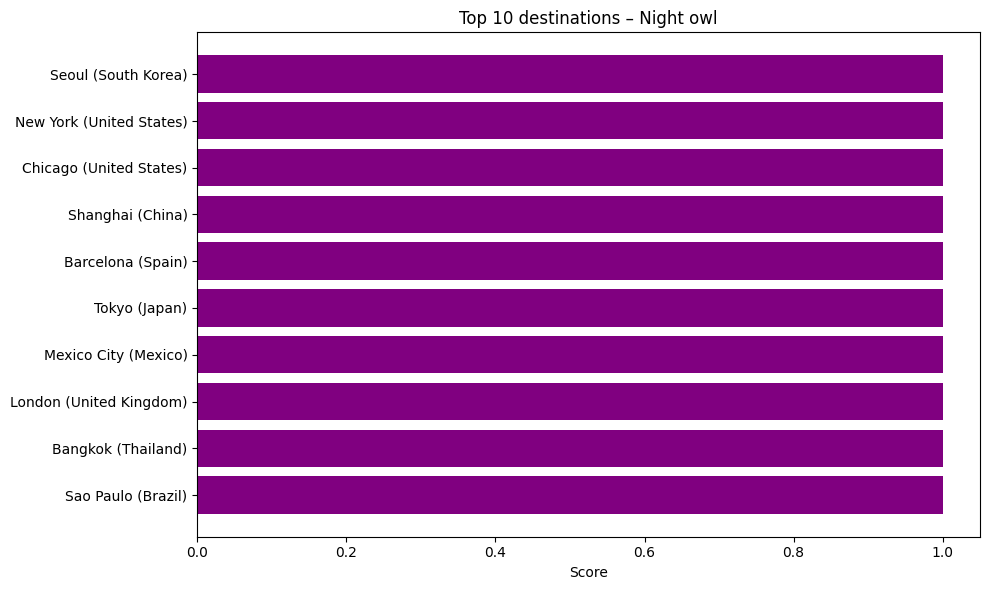

In [14]:
plt.figure(figsize=(10,6))
plt.barh(top_night["city"] + " (" + top_night["country"] + ")", top_night["score_night"], color="purple")
plt.gca().invert_yaxis()
plt.title("Top 10 destinations – Night owl")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

# 07 Summary of Findings

## 1. Data Overview:

- The dataset contains destinations with multiple attributes such as seclusion, urban, nature, nightlife, culture, cuisine, wellness, and geographic coordinates.
  
- All scores range from 1 to 5, so the data is fairly structured and does not contain extreme outliers.
  
## 2. Correlation Analysis:

- Seclusion shows a strong negative correlation with urban (-0.80) and nightlife (-0.73), indicating that more secluded destinations are typically less urban and offer less nightlife.

- Seclusion shows a strong positive correlation with nature (+0.69), meaning secluded destinations are generally more nature-oriented.

- Attributes such as culture and cuisine also have moderate negative correlations with seclusion.


## 3. Categorization by Seclusion:

- Destinations were bucketed into three levels: Low, Mid, and High seclusion.

- Low-seclusion destinations score high in urban and nightlife, while high-seclusion destinations excel in nature and wellness.

## 4. Traveler Profile Analysis:

Two traveler profiles were defined:

- Nature Lover: Prefers high nature and seclusion but low urban influence.

- Nightlife Seeker: Prefers high nightlife and cuisine scores, typically linked with more urbanized destinations.

For both profiles, top 10 destinations were identified and visualized with bar charts.

# 08 Key Insights: 

- Travelers looking for relaxation and natural experiences should target high-seclusion destinations, as they strongly correlate with nature and wellness.

- Those seeking vibrant urban life, nightlife, and cuisine should opt for low-seclusion destinations, as these are highly urbanized and culturally rich.

- There is a clear trade-off between urban activities and secluded natural experiences, meaning destinations rarely excel at both.
